### Introduction
Using Naive Bayes to classify spam emails.

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv('emails.csv')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.count()

text    5728
spam    5728
dtype: int64

In [6]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [10]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Visualize data

/Users/Danni/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='spam', ylabel='count'>

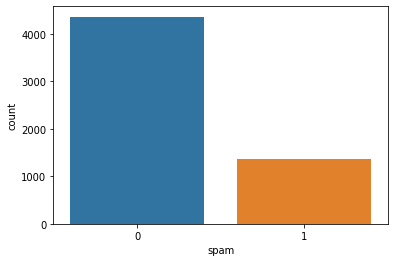

In [12]:
sns.countplot(data['spam'])

### Clean up data: remove punctuation, stop words

In [17]:
# test remove punctuations

import string as str

test_msg='hello world!'

new_msg=test_msg.translate(test_msg.maketrans('', '', str.punctuation))

new_msg

'hello world'

In [27]:
# test remove stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/Danni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords

test_msg='hello world and THE cat'

new_msg=' '.join([word for word in test_msg.lower().split() if word not in stopwords.words('english')])
new_msg

'hello world cat'

In [43]:
# define a function to combine above steps for cleaning data:

def data_clean(text):
    import string as str
    from nltk.corpus import stopwords
    text_no_punc=text.translate(text.maketrans('','',str.punctuation))   #remove punctuations
    text_no_punc_stopwords=' '.join([word for word in text_no_punc.lower().split() if word not in stopwords.words('english')])  #remove stopwords
    return text_no_punc_stopwords



In [47]:
# apply data_clean function on original data

data['text']=data['text'].apply(data_clean)

In [54]:
data.head(10)

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cds software compat...,1
5,subject great nnews hello welcome medzonline s...,1
6,subject hot play motion homeland security inve...,1
7,subject save money buy getting thing tried cia...,1
8,subject undeliverable home based business grow...,1
9,subject save money buy getting thing tried cia...,1


In [56]:
data['text'][0]

'subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good products effective business organization practicable aim hotat nowadays market promise marketing efforts become much effective list clear benefits creativeness hand made original logos specially done reflect distinctive company image convenience logo stationery provided formats easy use content management system letsyou change website content even structure promptness see logo drafts within three business days affordability marketing break make gaps budget 100 satisfaction guaranteed provide unlimited amount changes extra fees surethat love result collaboration look portfolio interested'

### CountVectorizer

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
data_vec=vectorizer.fit_transform(data['text'])

In [64]:
data_vec.shape

(5728, 37187)

In [63]:
data_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
y=data['spam'].values

In [85]:
y.shape

(5728,)

### Train/test split and train model

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data_vec,y, test_size=0.2 )

In [87]:
X_train.shape

(4582, 37187)

In [88]:
# use Naive Bayes to classify

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluation

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
y_pred=model.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       859
          1       0.97      0.99      0.98       287

avg / total       0.99      0.99      0.99      1146



In [97]:
cm=confusion_matrix(y_test, y_pred)

<AxesSubplot:>

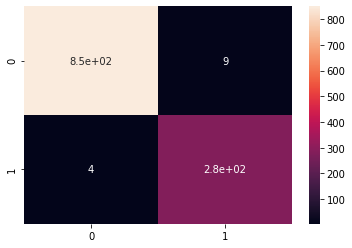

In [99]:
sns.heatmap(cm, annot=True)